In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("/Users/neelesh/Documents/FS-Sem2/fin_man/ESG-and-Financial-Performance/Data Collection/tr_esg_df_cleaned.csv")
df

,Unnamed: 0,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,key
0,2,2002,-4.703688,10.732601,10.732601,100.0,16.469428,16.153846,0.000000,DK0010244508
1,3,2003,78.725725,16.933543,16.933543,100.0,19.033531,34.523810,0.000000,DK0010244508
2,4,2004,6.899061,17.855846,17.855846,100.0,20.465337,26.862745,7.523148,DK0010244508
3,5,2005,45.463359,16.395483,16.395483,100.0,20.152244,17.166667,11.683007,DK0010244508
4,6,2006,-17.550102,18.732474,18.732474,60.0,20.633013,25.500000,11.033951,DK0010244508
...,...,...,...,...,...,...,...,...,...,...
78513,224825,2019,26.394231,15.634041,15.634041,100.0,34.005387,9.318397,0.000000,US2825591033
78514,224826,2020,-7.303157,16.460435,16.460435,100.0,31.797347,13.460427,0.000000,US2825591033
78515,224827,2021,-46.368486,20.954503,20.954503,100.0,29.832687,26.835159,0.000000,US2825591033
78516,224849,2020,16.224490,37.367401,37.367401,100.0,45.666329,33.923344,21.332694,US65443P1021


In [3]:
df.rename(columns={'key': 'company ISIN'}, inplace=True)
df

,Unnamed: 0,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,company ISIN
0,2,2002,-4.703688,10.732601,10.732601,100.0,16.469428,16.153846,0.000000,DK0010244508
1,3,2003,78.725725,16.933543,16.933543,100.0,19.033531,34.523810,0.000000,DK0010244508
2,4,2004,6.899061,17.855846,17.855846,100.0,20.465337,26.862745,7.523148,DK0010244508
3,5,2005,45.463359,16.395483,16.395483,100.0,20.152244,17.166667,11.683007,DK0010244508
4,6,2006,-17.550102,18.732474,18.732474,60.0,20.633013,25.500000,11.033951,DK0010244508
...,...,...,...,...,...,...,...,...,...,...
78513,224825,2019,26.394231,15.634041,15.634041,100.0,34.005387,9.318397,0.000000,US2825591033
78514,224826,2020,-7.303157,16.460435,16.460435,100.0,31.797347,13.460427,0.000000,US2825591033
78515,224827,2021,-46.368486,20.954503,20.954503,100.0,29.832687,26.835159,0.000000,US2825591033
78516,224849,2020,16.224490,37.367401,37.367401,100.0,45.666329,33.923344,21.332694,US65443P1021


In [4]:
# summary statistics for each column
df.describe()

,Unnamed: 0,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score
count,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000,78518.000000
mean,113100.731565,2015.411460,22.389496,42.959969,41.591191,92.414474,43.341436,49.349823,34.939033
std,64343.897112,4.938848,1498.768525,20.669228,19.549302,20.860966,23.665218,22.497985,28.804813
min,2.000000,2002.000000,-99.746078,0.402390,0.402390,0.434783,0.052692,0.055461,0.000000
25%,57834.250000,2012.000000,-12.713076,26.355972,26.111188,100.000000,24.388553,31.272302,6.792453
50%,113807.500000,2017.000000,8.607150,41.217956,40.173941,100.000000,41.084089,49.699454,30.733845
75%,168876.750000,2019.000000,32.835048,58.777385,56.140109,100.000000,61.423911,67.500613,59.058696
max,224850.000000,2022.000000,418378.749245,95.432823,94.954180,100.000000,99.564164,99.622901,99.228074


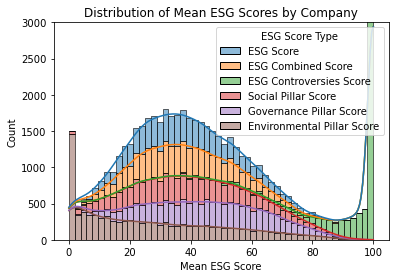

In [5]:
# distribution of mean ESG scores of companies (identified by Company ISIN) over the years

# Group the DataFrame by Company ISIN and calculate the mean ESG scores
df_grouped = df.groupby('company ISIN').mean()[['ESG Score', 'ESG Combined Score', 'ESG Controversies Score', 'Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score']]

# Melt the DataFrame to create a "long" format with Company ISIN as the ID variable
df_melted = df_grouped.reset_index().melt(id_vars=['company ISIN'], var_name='ESG Score Type', value_name='Mean ESG Score')

# Create a histogram of the mean ESG scores
g = sns.histplot(data=df_melted, x='Mean ESG Score', hue='ESG Score Type', kde=True, multiple='stack')
g.set(title='Distribution of Mean ESG Scores by Company', xlabel='Mean ESG Score', ylabel='Count')
g.set_ylim(0, 3000)
plt.show()


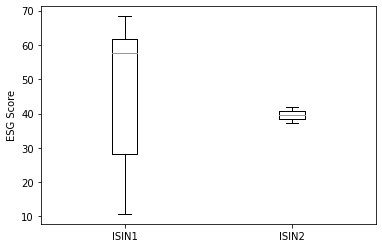

In [6]:
# Comparing the ESG scores of different companies using a box plot
ISIN1 = 'DK0010244508'
ISIN2 = 'US65443P1021'


plt.boxplot([df[df['company ISIN'] == ISIN1]['ESG Score'], df[df['company ISIN'] == ISIN2]['ESG Score']])
plt.xticks([1, 2], ['ISIN1', 'ISIN2'])
plt.ylabel('ESG Score')
plt.show()

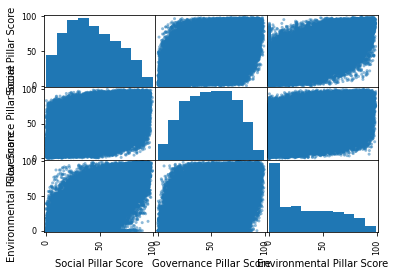

In [7]:
# Checking the correlation between different ESG pillars using a scatter plot matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df[['Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score']])
plt.show()

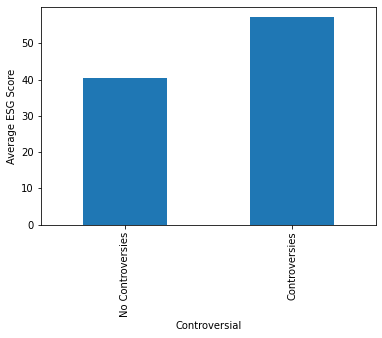

In [8]:
# Comparing the ESG scores of companies with different levels of ESG controversies using a stacked bar chart

df['Controversial'] = df['ESG Controversies Score'] < 100

controversial_esg = df.groupby('Controversial')['ESG Score'].mean()
controversial_esg.plot(kind='bar', stacked=True)
plt.ylabel('Average ESG Score')
plt.xticks([0, 1], ['No Controversies', 'Controversies'])
plt.show()


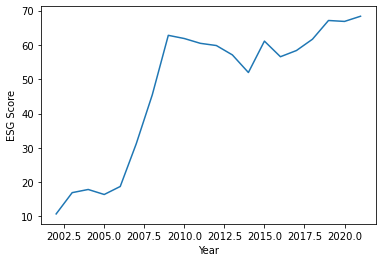

In [9]:
# Checking the trend in ESG scores over time for a specific company using a line chart:

company_data = df[df['company ISIN'] == ISIN1]

plt.plot(company_data['Year'], company_data['ESG Score'])
plt.xlabel('Year')
plt.ylabel('ESG Score')
plt.show()


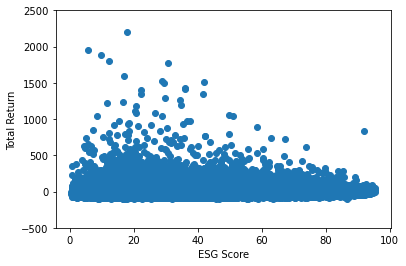

In [10]:
# Visualizing the relationship between ESG Score and Total Return using a scatter plot

plt.scatter(df['ESG Score'], df['Total Return'])
plt.xlabel('ESG Score')
plt.ylabel('Total Return')
plt.ylim(-500, 2500)
plt.show()


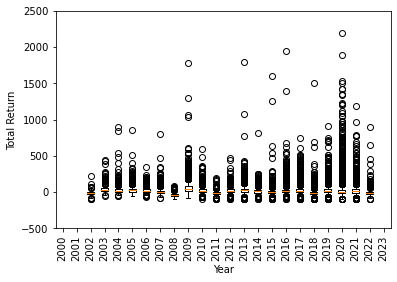

In [11]:
# Checking the distribution of Total Return by year using a box plot
plt.boxplot([df[df['Year'] == year]['Total Return'] for year in range(2000, 2024)])
plt.xticks(range(1, 25), range(2000, 2024), rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Return')
plt.ylim(-500, 2500)
plt.show()


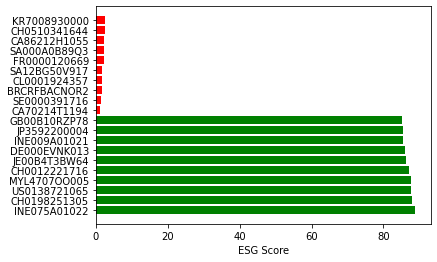

In [12]:
# Identifying the top companies with the highest and lowest ESG scores using a bar chart
top_esg = df.groupby('company ISIN')['ESG Score'].mean().sort_values(ascending=False)[:10]
bottom_esg = df.groupby('company ISIN')['ESG Score'].mean().sort_values()[:10]

plt.barh(range(10), top_esg.values, align='center', color='green')
plt.barh(range(10, 20), bottom_esg.values, align='center', color='red')
plt.yticks(range(20), list(top_esg.index) + list(bottom_esg.index))
plt.xlabel('ESG Score')
plt.show()

In [13]:
# Comparing the distribution of ESG scores for companies in different industries using a violin plot

# This is interesting

# Once we have columns of Industry/Country/Region ,etc for given Company ISINs in this file, we can perform this analysis


# sns.violinplot(x='ESG Score', y='Industry', data=df)
# plt.xlabel('ESG Score')
# plt.ylabel('Industry')
# plt.show()


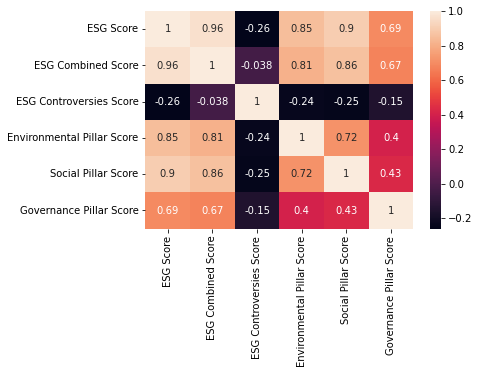

In [14]:
# Checking the correlation between ESG Score and individual ESG pillars using a heatmap

esg_pillars = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score']
esg_corr = np.corrcoef(df[esg_pillars].T)
sns.heatmap(esg_corr, annot=True, xticklabels=esg_pillars, yticklabels=esg_pillars)
plt.show()


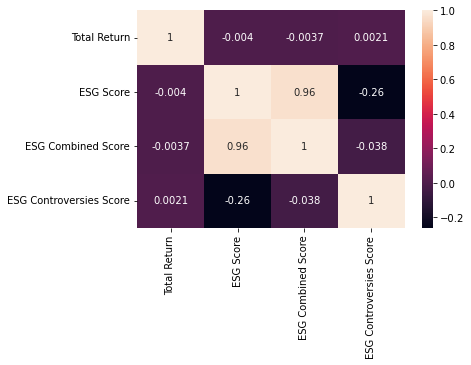

In [15]:
# Checking the correlation between Total Return and various ESG Scores using a heatmap

features = ['Total Return', 'ESG Score', 'ESG Combined Score', 'ESG Controversies Score']
esg_corr = np.corrcoef(df[features].T)
sns.heatmap(esg_corr, annot=True, xticklabels=features, yticklabels=features)
plt.show()

In [16]:
# Using Random Forests to calculate feature importances

# Define X and y
X = df[['ESG Score', 'ESG Combined Score', 'ESG Controversies Score',
        'Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score']]
y = df['Total Return']

# Fit a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")


ESG Score: 0.120
ESG Combined Score: 0.090
ESG Controversies Score: 0.012
Social Pillar Score: 0.147
Governance Pillar Score: 0.597
Environmental Pillar Score: 0.034
